<a href="https://colab.research.google.com/github/KSK123123/AIFFEL_quest_cr/blob/master/Python/Py03/PythonQuest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [파이썬] 퀘스트: 클로저를 활용한 문제해결하기

난이도: ★★★★☆  
장르: nonlocal, 클로저, 데코레이터 활용  

---




## 문제 1. 최댓값과 최솟값 찾기



조건:  
* 주어진 리스트의 최댓값과 최솟값을 반환하는 클로저 함수를 완성해 주세요.
    * 주어진 숫자 리스트 numbers에 대해 find_min_max 함수를 호출하면 find_min과 find_max 함수를 얻을 수 있습니다.
    * find_min() 함수를 호출하면 최솟값을, find_max()함수를 호출하면 최댓값을 반환합니다.
    * 클로저를 사용하여 min_value와 max_value 변수를 외부에 노출하지 않고도 최솟값과 최대값을 찾을 수 있습니다.
    * find_min_max 함수가 호출된 이후에도 find_min과 find_max 함수를 통해 min_value와 max_value 변수에 접근할 수 있습니다.
* 주석으로 구현 내용이 써있는 부분을 코드로 채워주세요.
---
입력:
```python
numbers = [10, 5, 8, 12, 3, 7]
find_min, find_max = find_min_max(numbers)

print("최솟값:", find_min())  
print("최댓값:", find_max())  
```
---
출력:
```
3
12
```


In [ ]:
def find_min_max(numbers):
    # min_value와 max_value 변수를 초기화
    # min_value는 양의 무한대(float('inf'))로 초기화하여 어떤 숫자보다도 큰 값으로 설정
    min_value = float('inf')
    # max_value는 음의 무한대(float('-inf'))로 초기화하여 어떤 숫자보다도 작은 값으로 설정
    max_value = float('-inf')

    def update_min_max(num):
        # 외부함수의 변수인 min_value, max_value 참조
        nonlocal min_value, max_value


        # 만약 num 값이 min_value보다 작다면 min_value를 num 값으로 변경
        if num < min_value:
            min_value = num


        # 만약 num 값이 max_value보다 크다면 max_value를 num 값으로 변경
        if num > max_value:
            max_value = num


    # numbers 리스트의 모든 값을 순환하며 최댓값과 최솟값 업데이트
    for num in numbers:
        update_min_max(num)

    # 최솟값을 반환하는 내부함수
    def get_min():
      return  min_value


    # 최댓값을 반환하는 내부함수
    def get_max():
      return max_value


    # 외부함수는 내부함수(get_min()과 get_max())를 반환
    return get_min, get_max



In [ ]:
numbers = [10, 5, 8, 12, 3, 7]
find_min, find_max = find_min_max(numbers)

print("최솟값:", find_min())  # 3
print("최댓값:", find_max())  # 12

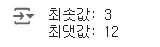

## 문제 2. 함수의 호출 횟수를 세는 데코레이터

지난 시간에 배운 데코레이터를 기억하시나요? 데코레이터도 내부함수를 반환하는 클로저를 활용한 문법입니다. 클로저를 활용하여 함수 호출 횟수를 출력하는 데코레이터를 만들어봅시다.

조건:
* 함수가 실행될 때 마다 함수 이름과 실행 횟수를 출력하는 데코레이터 `counter` 만들기  

힌트:
* 데코레이터의 내부 함수(클로저)는 실행횟수를 기억하기 위해 외부 함수의 변수를 참조 해야 합니다
* 함수의 이름은 `함수이름.__name__`으로 접근할 수 있습니다.

---
입력:
```python
@counter
def say_hello():
    print("Hello Aiffel!")

for i in range(5):
    say_hello()
```
---
출력:
```
Hello Aiffel!
say_hello 실행횟수: 1
Hello Aiffel!
say_hello 실행횟수: 2
Hello Aiffel!
say_hello 실행횟수: 3
Hello Aiffel!
say_hello 실행횟수: 4
Hello Aiffel!
say_hello 실행횟수: 5
```

In [ ]:
def counter(fn):
  count = 0

  def say_count():
    nonlocal count
    count += 1
    fn()
    print(f"say_hello 실행횟수: {count}")

  return say_count

In [ ]:
@counter
def say_hello():
    print("Hello Aiffel!")

for i in range(5):
    say_hello()

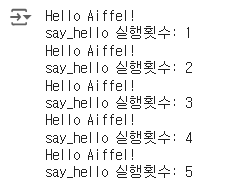

# 회고

# [임만순]
최댓값과 최솟값을 찾는 문제에서 해당하는 조건을 보고 어떤 명령어를 사용해야 하는지 어려움을 느꼈는데, 전체적인 틀이 기재된 상태였기 때문에 이를 토대로 요구사항을 동료 승기씨와 함께 의견을 공유하며 한 줄씩 해결해 나갔습니다. 함수의 호출 횟수 데코레이터에서는 데코레이터 개념부터 다시 확인하고, 처음에는 외부함수 2개를 만들어서 코드가 길고 난잡했는데, 커뮤니케이션을 통해 외부함수를 줄이고 코드를 좀 더 간결하게 만들 수 있었습니다.

---

# [김승기]
일단 문제를 받고 보니 막막했습니다. 주석이 적혀있는 무수한 코드줄은 뇌를 강타했고 어디부터 시작해야할지 몰랐습니다. 하지만 주석을 유심히 보니 코드에 대한 자세한 설명이 나와있는 것을 확인할 수 있었습니다. 만순님과 의논하며 코드 설명대로 작성해보니 정상적으로 실행되는 것을 확인할 수 있었습니다.

두번째 문제에서 데코레이터에 관한 내용이 가물가물해서 LMS예제를 참고하며 수행했습니다.
이전 데코레이터 예제에 지역변수 개념을 적용하니 생각보다 쉬웠던 문제였습니다.